 # Perceptron linéaire

#### On veut deviner une application linéaire
f(x, u, z, t) = w1x + w2u + w3z + w4t + b
où w1, w2, w3, w4 et b sont fixés à l'avance


    Par exemple :
w1 = 0.7                         
w2 = 0.36
w3 = -0.22  
w4 = 0.17
b = -0,45

à l'aide d'un perceptron linéaire et d'une fonction d'activation a seuil :

Si f(x) >= 0   --->   y = 1
Si f(x) <= 0   --->   y = 0

In [1]:
def f(x, u, z, t):
    res = 0.7 * x + 0.36 * u - 0.22 * z + 0.17 * t - 0.45
    # resultat de y en fonction de f
    if res >= 0:
        return 1
    else:
        return 0

### Génération d'un jeu de données d'apprentissage
n = 200
générer aléatoirement n données étiquetées
X = [([x1, x2, x3, x4],y=f(x));...] xi e [0,1]
afficher les étiquettes y1,...,yn

In [2]:
import random


def donnees(n):
    # Pour ne pas la redéfinir a chaque passage de boucle
    X = []
    for _ in range(n):
        x1, x2, x3, x4 = random.random(), random.random(), random.random(), random.random()
        X.append(([x1, x2, x3, x4], f(x1, x2, x3, x4)))
    return X

### Définitiondu modèle et programmation avant

On prend des lots de taille B = 1
ie on traite les données par une 

In [3]:
def perceptron(W, b, X):
    return int((sum([W[i] * X[i] for i in range(len(W))]) + b) >= 0)


### Test 
On fixe l'erreur simple eu = | y - ypredit|
Quel est le taux d'erreur pour W = (0.5, -0.5, 0.5, -0.5) et b = 0 ?

In [4]:
def score(W, b, X):
    sc = 0
    for i in range(len(X)):    
        sc += abs(perceptron(W,b,X[i][0])- X[i][1])
    return sc/ len(X)

#Défini pour l'exemple
W = (0.5, -0.5, 0.5, -0.5)
b = 0
#Aléatoire a chaque fois du au x1,...,x4 aléatoire 
X = donnees(200)

perceptron(W, b, X[0][0])
score(W, b, X)

0.535

### Apprentissage et descente de gradient

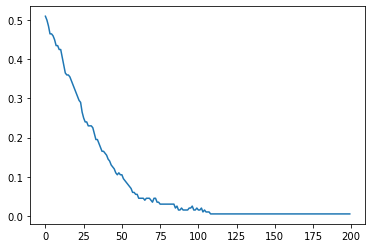

In [5]:
def apprentissage(W, b, X, etha):
    for x,y in X:
        u = perceptron(W, b, x)
        if y > u:
            W = [W[i] + etha*x[i] for i in range(len(W))]
            b += etha
        elif u > y:
            W = [W[i] - etha*x[i] for i in range(len(W))]
            b -= etha
    return W,b

etha = 0.001
scores = []
for i in range(200):
    W,b = apprentissage(W, b, X, etha)
    scores.append(score(W, b, X))
import matplotlib.pyplot as plt
plt.plot(scores)
plt.show()